## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve

1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [117]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"cheyoung211","key":"00fb5c6d79c543e190360503792d8810"}'}

In [118]:
ls -1ha kaggle.json

kaggle.json


In [119]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [120]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [121]:
!ls

 diabetes.csv  'kaggle (1).json'   kaggle.json	 pima-indians-diabetes-database.zip   sample_data


In [122]:
!unzip /content/pima-indians-diabetes-database.zip

Archive:  /content/pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: diabetes.csv            


In [123]:
data = pd.read_csv('/content/diabetes.csv')

In [124]:
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [125]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [126]:
Y = data['Outcome']
X = data.drop('Outcome', axis = 1)

In [127]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


<Axes: >

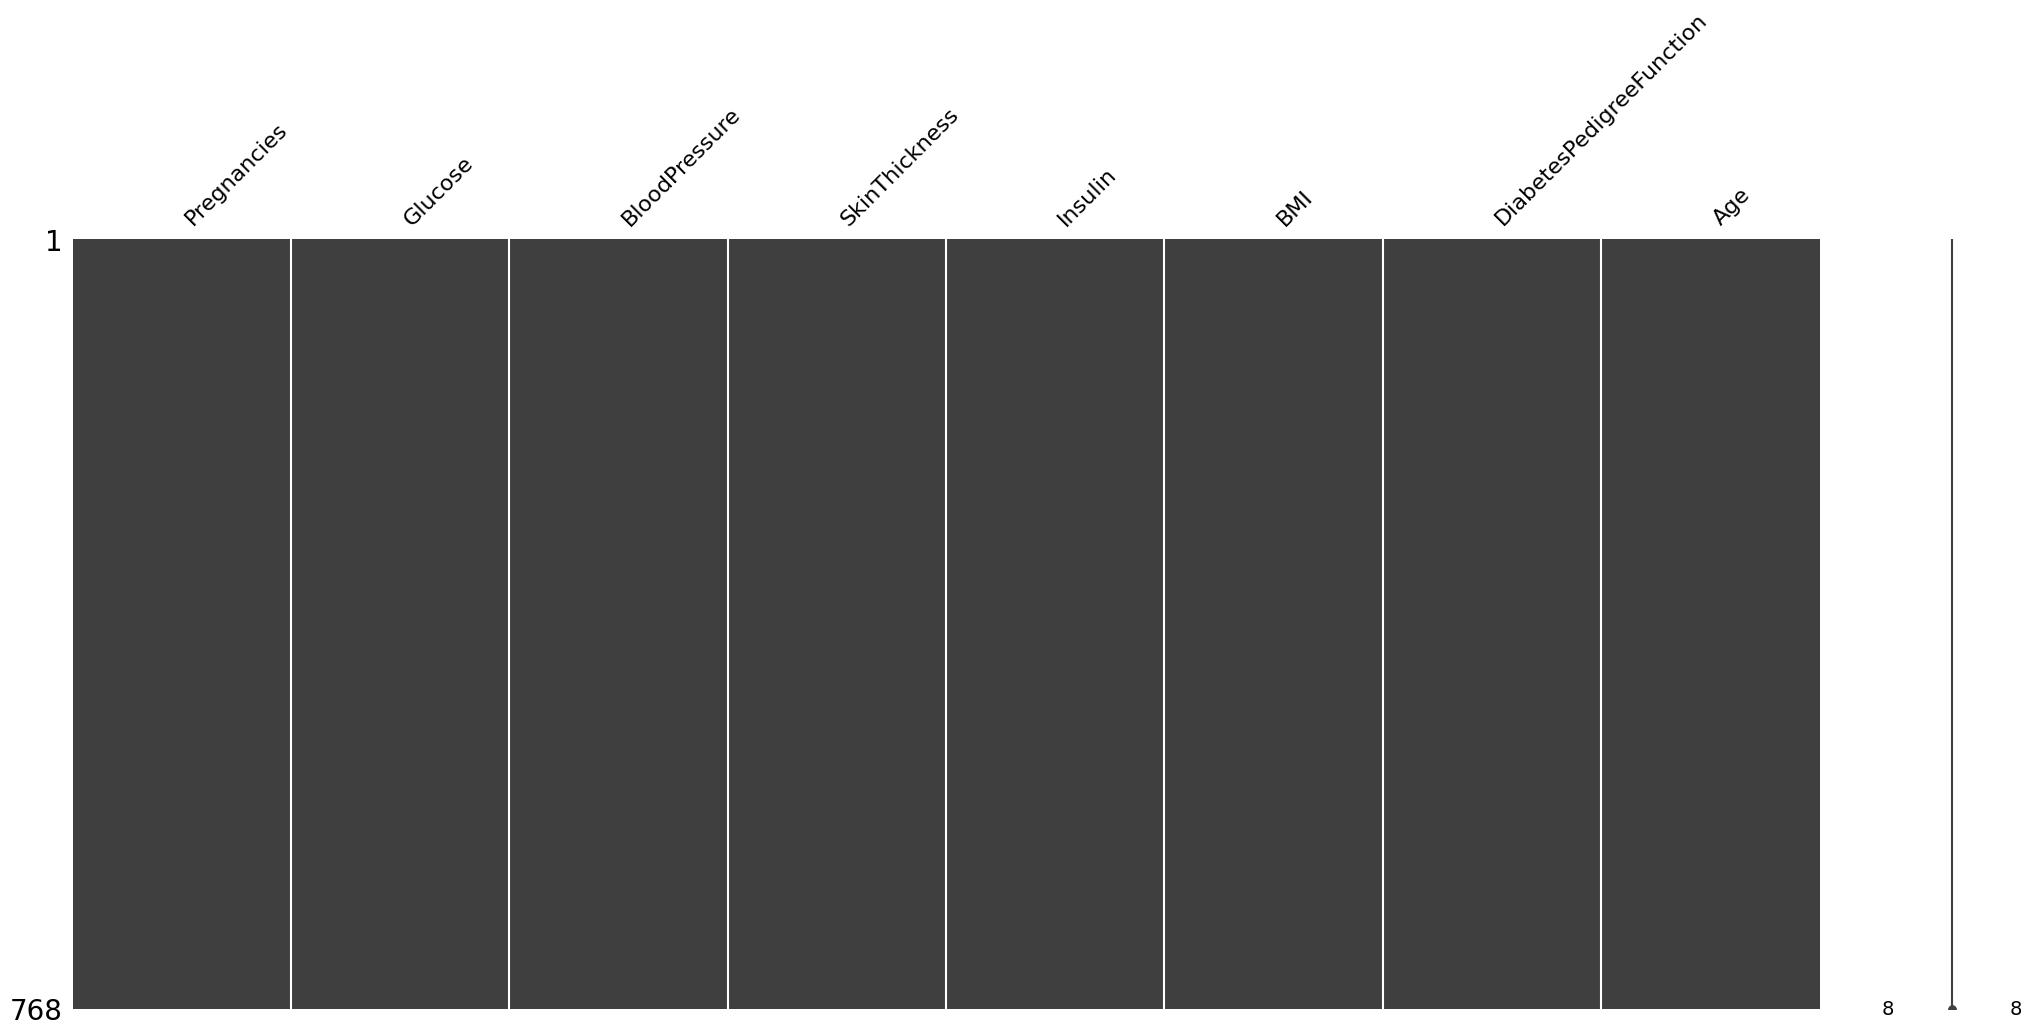

In [128]:
import missingno as msno
msno.matrix(X)

In [129]:
X.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [130]:
#위에서 이미 나눔,,,,

1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.3, random_state = 123, stratify = Y)

In [132]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
323,13,152,90,33,29,26.8,0.731,43
448,0,104,64,37,64,33.6,0.510,22
84,5,137,108,0,0,48.8,0.227,37
529,0,111,65,0,0,24.6,0.660,31
329,6,105,70,32,68,30.8,0.122,37
...,...,...,...,...,...,...,...,...
327,10,179,70,0,0,35.1,0.200,37
57,0,100,88,60,110,46.8,0.962,31
112,1,89,76,34,37,31.2,0.192,23
751,1,121,78,39,74,39.0,0.261,28


In [133]:
Y_train

323    1
448    1
84     1
529    0
329    0
      ..
327    0
57     0
112    0
751    0
213    1
Name: Outcome, Length: 537, dtype: int64

1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

test_size는 보통 전체 데이터의 1/4 ~ 1/5 정도를 지정한다. 그 이유는 test size가 너무 많으면 train할 데이터가 부족하여 underfitting이 될 것이고, 그 반대면 overfitting이 될 것이다. 하지만 최근데는 이러한 방법론이 불필요하다고 보는 연구도 많다.

1.7 startify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

stratify는 target 값의 분포가 편중되어 있을때 주로 사용한다. train data와 test data를 나눌 때 각 target 값의 분포가 고르게 나누어져야 모델을 학습하는데 도움이 되기 때문이다.

### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [134]:
def clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    #accuracy, precision, recall, f1, roc_auc(roc_auc_score의 경우 y_test와 pred_proba로 측정)는 직접 작성
    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test,pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba[:,1])

    print('오차 행렬,\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

2. 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

confusion martix는 실제값과 예측값을 비교하여 모델의 성능을 나타내는 성능 비교 수치이다.

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [135]:
lr_model = LogisticRegression(random_state = 123, solver = 'liblinear')
lr_model.fit(X_train, Y_train)
pred = lr_model.predict(X_test)
pred_proba = lr_model.predict_proba(X_test)
clf_eval(Y_test.values, pred, pred_proba)

오차 행렬,
 [[134  16]
 [ 39  42]]
정확도: 0.7619, 정밀도: 0.7241, 재현율: 0.518519, F1: 0.6043, AUC:0.8436


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

scikit learn의 LogisticRegression의 option 중 하나인 solver는 모델을 최적화할 때 사용하는 metric을 지정해줄 때 사용된다. Default 값으로는 'lbfgs'가 지정되어있고 'newton-cf','newton-cholesky','sag'등을 사용할 수 있다.

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

predict_proba는 모든 class들에 대한 확률값을 나타낸다. 이에 반해, pred는 pred_proba처럼 각 class에 대한 확률값을 계산한 뒤 가장 높은 확률값으로 판단한다.
roc-auc는 예측된 값을 기반으로 ROC curve의 AUC를 계산한다. 따라서 확률를 기반으로 한 값을 넣었을 때 성능이 더 좋게 나온다.

In [136]:
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [137]:
pred_proba

array([[0.8081722 , 0.1918278 ],
       [0.92044968, 0.07955032],
       [0.89044148, 0.10955852],
       [0.73934631, 0.26065369],
       [0.38774069, 0.61225931],
       [0.80603532, 0.19396468],
       [0.77987428, 0.22012572],
       [0.90412669, 0.09587331],
       [0.78747132, 0.21252868],
       [0.62174447, 0.37825553],
       [0.72466986, 0.27533014],
       [0.79552918, 0.20447082],
       [0.58248079, 0.41751921],
       [0.81419318, 0.18580682],
       [0.2528647 , 0.7471353 ],
       [0.44033016, 0.55966984],
       [0.71655608, 0.28344392],
       [0.841442  , 0.158558  ],
       [0.6341306 , 0.3658694 ],
       [0.79746627, 0.20253373],
       [0.34484567, 0.65515433],
       [0.68478555, 0.31521445],
       [0.23979341, 0.76020659],
       [0.79109797, 0.20890203],
       [0.66776616, 0.33223384],
       [0.18754468, 0.81245532],
       [0.65087152, 0.34912848],
       [0.83264829, 0.16735171],
       [0.5994548 , 0.4005452 ],
       [0.32408321, 0.67591679],
       [0.

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [138]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    #X축, y축 label과 legend, grid 설정
    ### 직접 작성(xlabel - 'Threshold value', ylabel = 'Precision and Recall value'), legend, grid는 default값으로
    plt.title('Change of Precisions and Recalls')
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall Value')
    plt.grid()
    plt.legend()
    plt.show()

2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

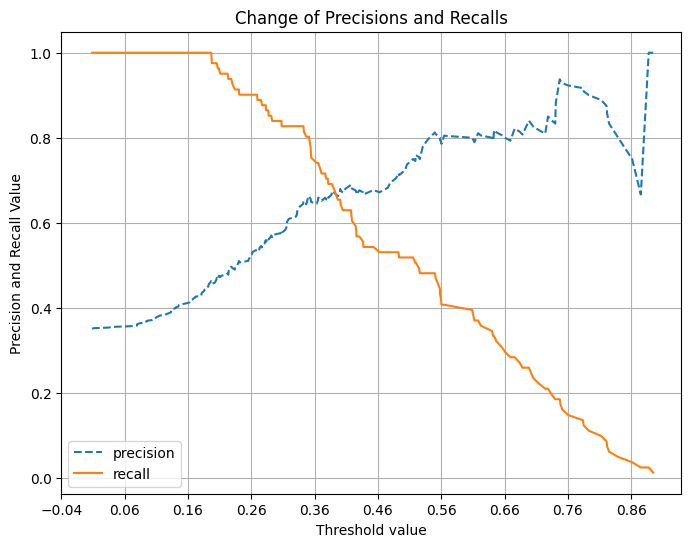

In [139]:
pred_proba_c1 = lr_model.predict_proba(X_test)[:,1]
precision_recall_curve_plot(Y_test, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [140]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [141]:
### Glucose, BloodPressure, SkinThickness, Insulin, BMI에 대해 평균값으로 대체
ave_glucose = X['Glucose'].mean()
X = X.replace(0, ave_glucose)

In [142]:
X['Glucose'].describe()
#min 값이 변경됨

count    768.000000
mean     121.681605
std       30.436016
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [143]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)

In [144]:
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.373273,0.865276,-0.165918,-0.497263,-0.205021,-0.009888,0.468492,1.425995
1,-0.495113,-1.205989,-0.546612,-0.637537,-0.205021,-0.567444,-0.365061,-0.190672
2,-0.324536,2.015979,-0.673510,1.510868,-0.205021,-0.830292,0.604397,-0.105584
3,-0.495113,-1.074480,-0.546612,-0.777811,-0.515176,-0.447968,-0.920763,-1.041549
4,2.426488,0.503626,-2.196285,-0.497263,0.338211,0.746795,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,-0.275800,-0.679954,0.087878,-0.193335,0.476598,-0.065643,-0.908682,2.532136
764,-0.470745,0.010468,-0.292816,-0.684295,-0.205021,0.244995,-0.398282,-0.531023
765,-0.397641,-0.022409,-0.165918,-0.777811,-0.307595,-0.599304,-0.685193,-0.275760
766,-0.495113,0.141977,-0.927306,1.510868,-0.205021,-0.288666,-0.371101,1.170732


In [145]:
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,6.476301e-17,-1.595946e-16,-3.018419e-16,-2.081668e-17,-9.945748e-17,6.245005e-17,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-4.951131e-01,-2.553955e+00,-3.211468e+00,-1.151876e+00,-1.437757e+00,-1.236511e+00,-1.189553e+00,-1.041549e+00
25%,-4.707450e-01,-7.210503e-01,-6.735098e-01,-7.310531e-01,-2.076003e-01,-4.957580e-01,-6.889685e-01,-7.862862e-01
50%,-3.976407e-01,-1.539182e-01,-1.024691e-01,-4.972628e-01,-2.050213e-01,-1.054689e-01,-3.001282e-01,-3.608474e-01
75%,-3.001684e-01,6.104773e-01,4.685715e-01,1.510868e+00,-1.317284e-01,2.469861e-01,4.662269e-01,6.602056e-01
max,2.426488e+00,2.542014e+00,3.006530e+00,1.510868e+00,8.157083e+00,6.943195e+00,5.883565e+00,4.063716e+00


2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

feature의 값은 그 단위 등이 달라 증감 값이 target 값에 영향을 주는 정도가 다르게 반영된다. 따라서 모든 feature들마다 target에 주는 영향을 같게 보기 위하여 feature마다의 값을 표준화 시켜준 것이다. 대표적으로 평균을 0, 분산을 1로 맞추는 standard scaler와, 최댓값과 최솟값을 기준으로 변환시켜주는 min-max scaler가 있다.

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [146]:
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 123, stratify = Y)

In [147]:
X_scaled_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
323,-0.202696,0.996785,0.976163,-0.544021,-1.264773,-0.551514,0.782584,0.830381
448,2.426488,-0.581322,-0.673510,-0.450505,-0.861144,-0.009888,0.115138,-0.956462
84,-0.397641,0.503626,2.118244,1.510868,-0.205021,1.200805,-0.739555,0.319855
529,2.426488,-0.351182,-0.610061,1.510868,-0.205021,-0.726745,0.568156,-0.190672
329,-0.373273,-0.548445,-0.292816,-0.567400,-0.815015,-0.232910,-1.056668,0.319855
...,...,...,...,...,...,...,...,...
327,-0.275800,1.884470,-0.292816,1.510868,-0.205021,0.109588,-0.821099,0.319855
57,2.426488,-0.712831,0.849265,0.087213,-0.330660,1.041503,1.480232,-0.190672
112,-0.495113,-1.074480,0.087878,-0.520642,-1.172515,-0.201050,-0.845260,-0.871374
751,-0.495113,-0.022409,0.214776,-0.403747,-0.745821,0.420227,-0.636871,-0.445935


2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [148]:
lr_model2 = LogisticRegression(random_state = 123, solver = 'liblinear')
lr_model2.fit(X_scaled_train, Y_scaled_train)
pred = lr_model2.predict(X_scaled_test)
pred_proba = lr_model2.predict_proba(X_scaled_test)
clf_eval(Y_scaled_test.values, pred, pred_proba)

오차 행렬,
 [[131  19]
 [ 40  41]]
정확도: 0.7446, 정밀도: 0.6833, 재현율: 0.506173, F1: 0.5816, AUC:0.8113


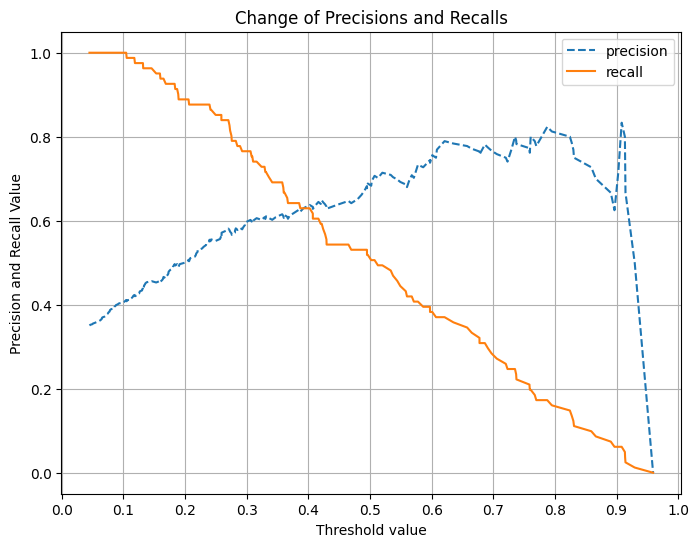

In [149]:
pred_proba_c2 = lr_model2.predict_proba(X_scaled_test)[:,1]
precision_recall_curve_plot(Y_scaled_test, pred_proba_c2)

### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

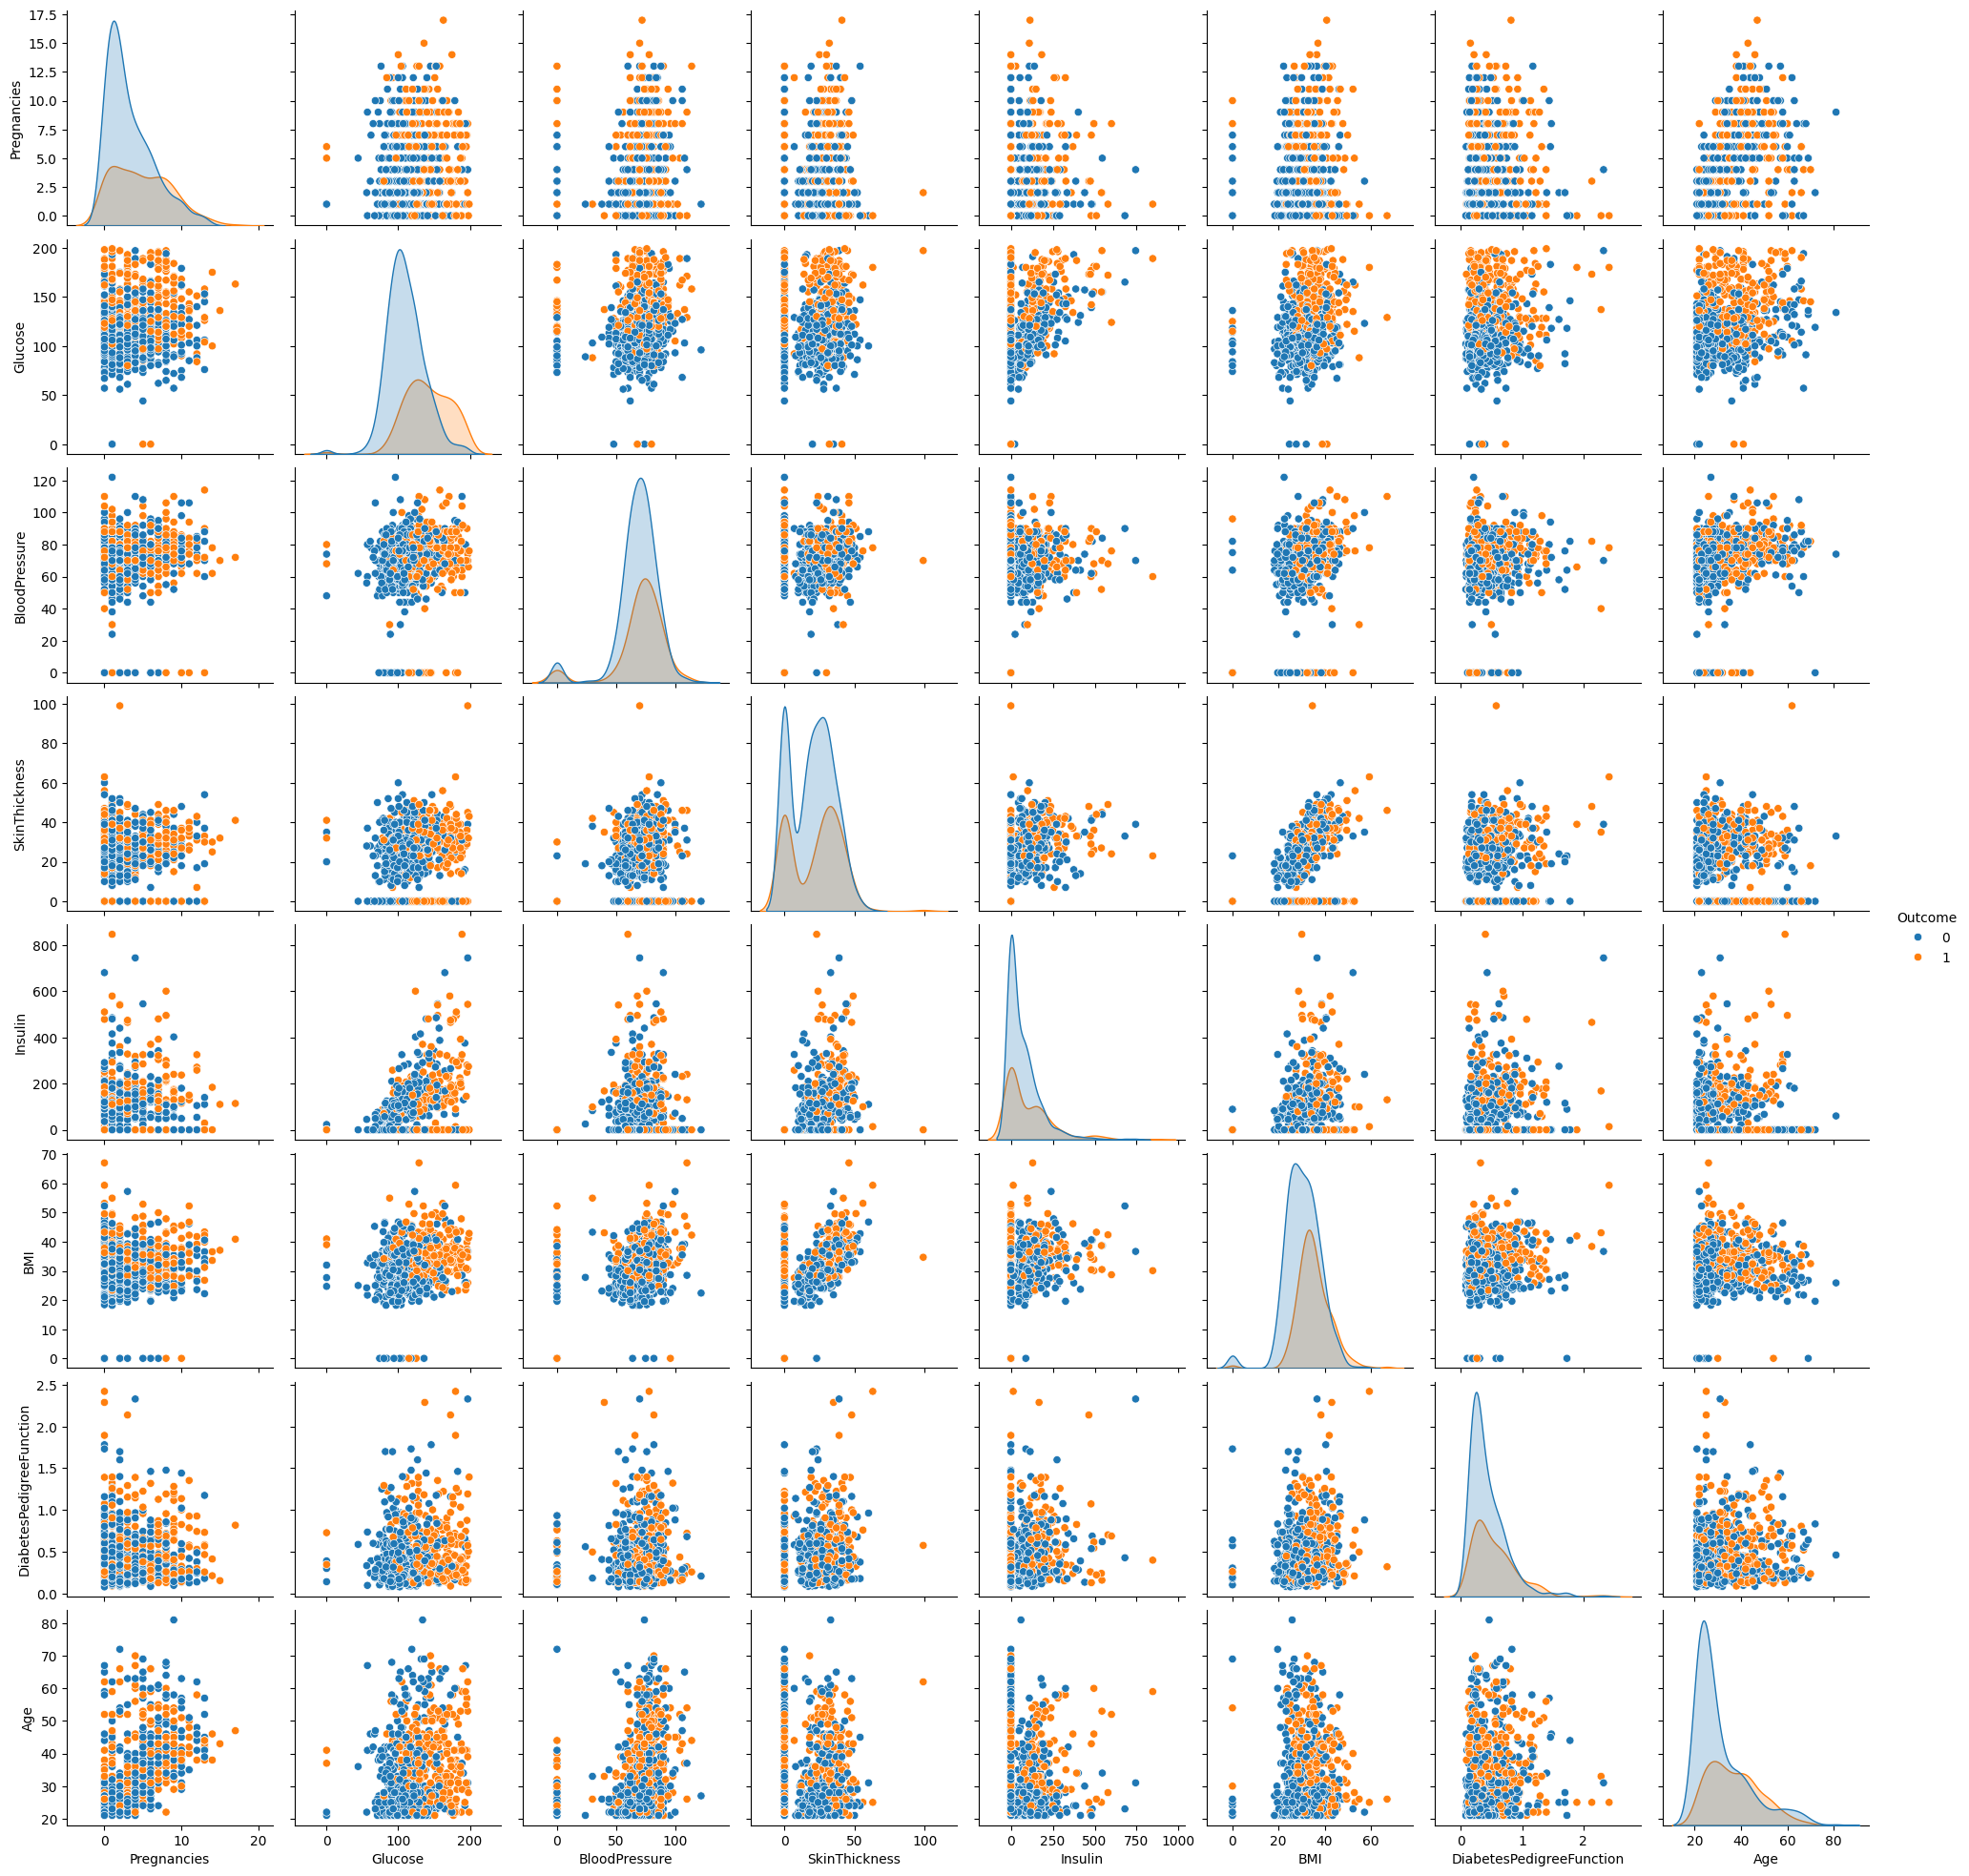

In [150]:
#데이터 확인
import seaborn as sns
sns.pairplot(data, hue = 'Outcome')
plt.show()

In [151]:
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(
    X, Y, test_size = 0.25, random_state = 123, stratify = Y
)

In [152]:
#train data와 test data로 나눈 뒤 scaling
scaler2 = StandardScaler()
scaler2.fit(X_train_new)
X_train_scaled2 = scaler2.transform(X_train_new)
X_train_scaled3 = pd.DataFrame(X_train_scaled2, columns = X_train.columns)
X_test_scaled2 = scaler2.transform(X_test_new)
X_test_scaled3 = pd.DataFrame(X_test_scaled2, columns = X_train.columns)

In [153]:
X_train_scaled3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.368956,-0.252826,-0.679686,1.491858,-0.201501,-0.497291,0.727064,0.055311
1,-0.487580,-1.644167,-0.292470,-0.694567,-0.201501,-0.452959,0.299606,-0.945494
2,-0.392680,-0.155755,1.385468,1.491858,-0.201501,-0.401239,-0.956418,-0.278291
3,-0.511305,0.070742,-0.937831,-0.578137,-0.201501,0.123357,0.088805,-1.028894
4,-0.416405,-0.382253,-0.421542,1.491858,-0.201501,-0.600733,-0.561166,-0.278291
...,...,...,...,...,...,...,...,...
571,2.333180,-0.705821,0.869180,0.073870,-0.327154,0.936110,1.400457,-0.194891
572,-0.511305,-1.061745,0.094747,-0.531565,-1.169103,-0.216522,-0.853945,-0.862094
573,-0.511305,-0.026328,0.223819,-0.415135,-0.742361,0.359794,-0.651928,-0.445092
574,-0.487580,-0.317539,-0.550614,-0.810996,-0.201501,-0.674619,-0.517249,-0.778693


Feature selection

In [154]:
X_train_scaled3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    float64
 1   Glucose                   576 non-null    float64
 2   BloodPressure             576 non-null    float64
 3   SkinThickness             576 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    float64
dtypes: float64(8)
memory usage: 36.1 KB


F-value : degree of linearity btw the input feature and the output feature (High F-value means high degree of linearity - feature와 target 간의 선형성)

In [155]:
feature_names = list(X_scaled.columns)

In [156]:
#각각의 feature에 대한 f-value
from sklearn.feature_selection import f_classif
f_value = f_classif(X_scaled, Y)
for feature in zip(feature_names, f_value[0]):
  print(feature)

('Pregnancies', 0.11587080084361712)
('Glucose', 245.8338561372358)
('BloodPressure', 19.919445373552993)
('SkinThickness', 7.0805253376227215)
('Insulin', 32.556353594484996)
('BMI', 14.288928893589206)
('DiabetesPedigreeFunction', 23.871300204344482)
('Age', 46.14061123873558)


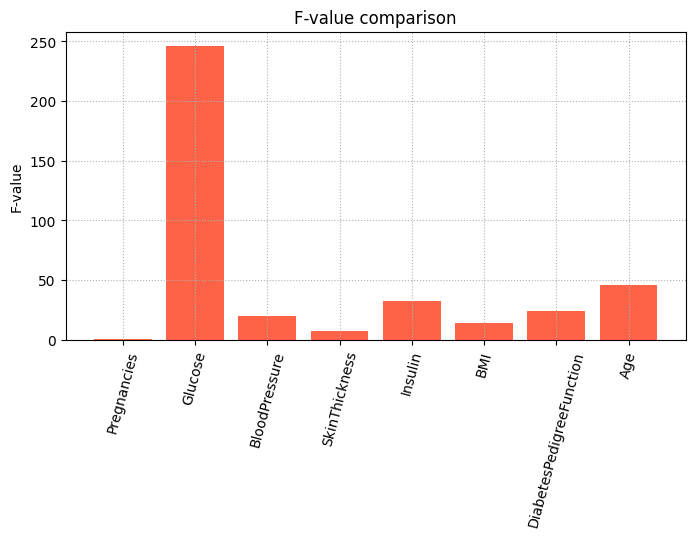

In [157]:
#시각화
plt.figure(figsize = (8,4))
plt.bar(feature_names, f_value[0], color = 'tomato')
plt.xticks(rotation = 75)
plt.ylabel('F-value')
plt.title('F-value comparison')
plt.grid(linestyle = ':')
plt.show()

Mutual Information - feature와 target값 사이에 상호 의존성을 확인\
nonlinear한 관계도 포착할 수 있고 correlation보다 상호 관계를 파악하는데 더 일반화된 방법

In [158]:
from sklearn.feature_selection import mutual_info_classif
MI_score = mutual_info_classif(X_scaled, Y, random_state = 123)
for feature in zip(feature_names, MI_score):
  print(feature)

('Pregnancies', 0.04239936588231452)
('Glucose', 0.10822217054960537)
('BloodPressure', 0.0)
('SkinThickness', 0.008056776855918324)
('Insulin', 0.0)
('BMI', 0.08952543271099755)
('DiabetesPedigreeFunction', 0.010500738383073083)
('Age', 0.07103532044727046)


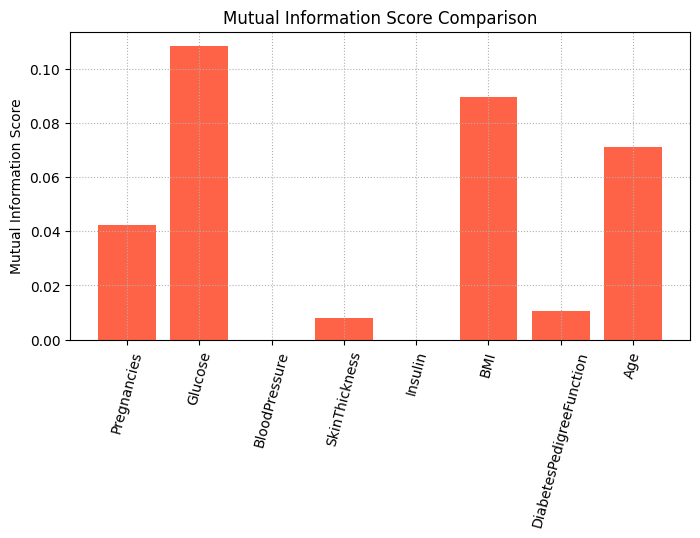

In [159]:
#시각화
plt.figure(figsize = (8,4))
plt.bar(feature_names, MI_score, color = 'tomato')
plt.xticks(rotation = 75)
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.grid(linestyle = ':')
plt.show()

SelectKBest

In [160]:
from sklearn.feature_selection import SelectKBest
for i in range(2,8):
  skb = SelectKBest(score_func = f_classif, k = i)
  X_new = skb.fit_transform(X_scaled, Y)
  print('Top {} selected feature'.format(i))
  feature_list = [feature_names[x] for x in skb.get_support(indices = True)]
  print(feature_list)

Top 2 selected feature
['Glucose', 'Age']
Top 3 selected feature
['Glucose', 'Insulin', 'Age']
Top 4 selected feature
['Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
Top 5 selected feature
['Glucose', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
Top 6 selected feature
['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Top 7 selected feature
['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [161]:
for i in range(2,8):
  skb = SelectKBest(score_func = mutual_info_classif, k = i)
  X_new = skb.fit_transform(X_scaled, Y)
  print('Top {} selected feature'.format(i))
  feature_list = [feature_names[x] for x in skb.get_support(indices = True)]
  print(feature_list)

Top 2 selected feature
['Glucose', 'BMI']
Top 3 selected feature
['Glucose', 'Insulin', 'BMI']
Top 4 selected feature
['Glucose', 'Insulin', 'BMI', 'Age']
Top 5 selected feature
['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']
Top 6 selected feature
['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age']
Top 7 selected feature
['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [162]:
#Pregnancies와 BloodPressure를 삭제하여 진행
X_train_extracted = X_train_scaled3.drop(['Pregnancies','BloodPressure'], axis = 1)
X_test_extracted = X_test_scaled3.drop(['Pregnancies','BloodPressure'], axis = 1)
X_train_extracted

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.252826,1.491858,-0.201501,-0.497291,0.727064,0.055311
1,-1.644167,-0.694567,-0.201501,-0.452959,0.299606,-0.945494
2,-0.155755,1.491858,-0.201501,-0.401239,-0.956418,-0.278291
3,0.070742,-0.578137,-0.201501,0.123357,0.088805,-1.028894
4,-0.382253,1.491858,-0.201501,-0.600733,-0.561166,-0.278291
...,...,...,...,...,...,...
571,-0.705821,0.073870,-0.327154,0.936110,1.400457,-0.194891
572,-1.061745,-0.531565,-1.169103,-0.216522,-0.853945,-0.862094
573,-0.026328,-0.415135,-0.742361,0.359794,-0.651928,-0.445092
574,-0.317539,-0.810996,-0.201501,-0.674619,-0.517249,-0.778693


In [163]:
lr_model3 = LogisticRegression(random_state = 123, solver = 'liblinear')
lr_model3.fit(X_train_extracted, Y_train_new)
pred = lr_model3.predict(X_test_extracted)
pred_proba = lr_model3.predict_proba(X_test_extracted)
clf_eval(Y_test_new.values, pred, pred_proba)

오차 행렬,
 [[110  15]
 [ 34  33]]
정확도: 0.7448, 정밀도: 0.6875, 재현율: 0.492537, F1: 0.5739, AUC:0.8214


Hyperparameter Tunning

In [164]:
#Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : np.logspace(-3,3,7),
              'solver' : ['newton-cg','lbfgs','liblinear','sag','saga']},
grid_search = GridSearchCV(LogisticRegression(random_state = 123), param_grid, cv = 10)
grid_search.fit(X_train_scaled3, Y_train_new)
print('Accuracy:', grid_search.score(X_test_scaled3,Y_test_new))
print('Best Parameters:',grid_search.best_params_)

Accuracy: 0.765625
Best Parameters: {'C': 0.1, 'solver': 'newton-cg'}


KNN

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

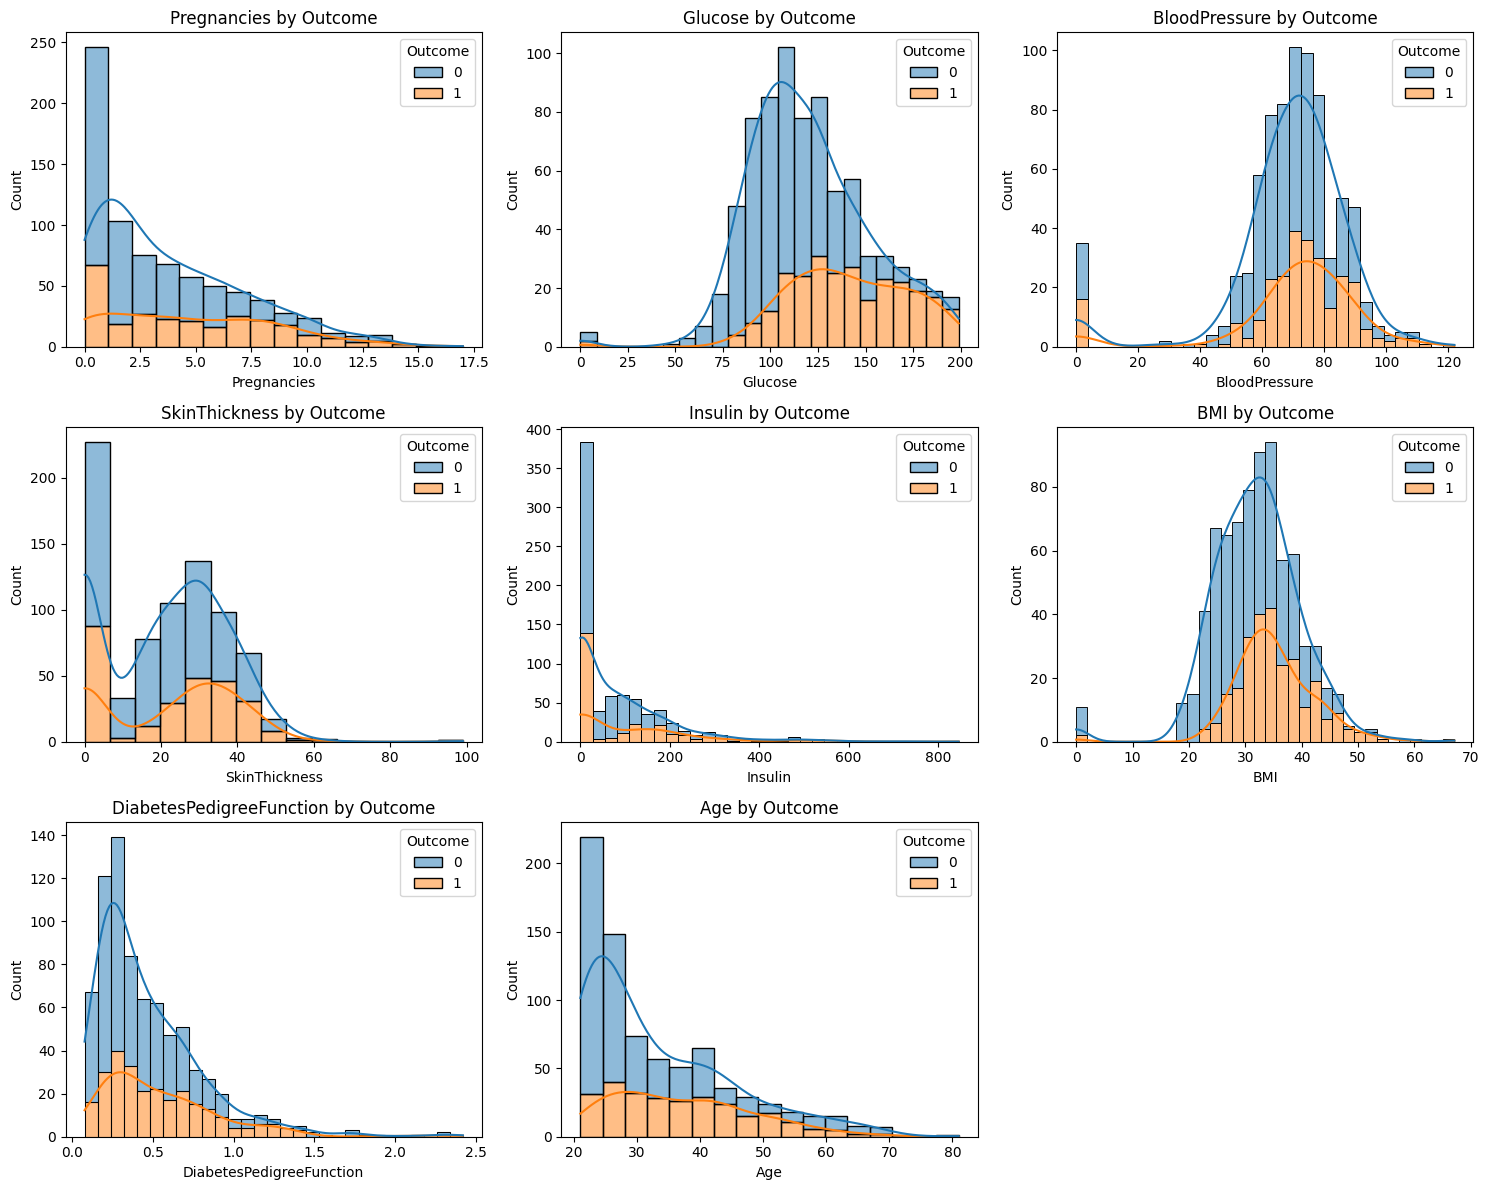

In [166]:
#각 feature들과 outcome 사이의 stacked histogram
num_features = len(feature_names)
num_rows = (num_features + 3) // 3

plt.figure(figsize = (15, 12))
for i, feature in enumerate(feature_names):
  row_num = (i // 3) + 1
  col_num = (i % 3) + 1

  plt.subplot(num_rows, 3, (row_num - 1) * 3 + col_num)
  sns.histplot(data, x = feature, hue="Outcome", multiple="stack", kde=True)
  plt.title(f"{feature} by Outcome")

plt.tight_layout()
plt.show()

In [167]:
print('Len of traiing set:', len(X_train_scaled3))
print('Len of testint set:', len(X_test_scaled3))

Len of traiing set: 576
Len of testint set: 192


In [168]:
k_list = [i for i in range(1,40)]
scores = []

for k in k_list:
  knn_model = KNeighborsClassifier(n_neighbors = k)
  score = cross_val_score(knn_model, X_scaled, Y, cv = 7)
  scores.append(np.mean(score))

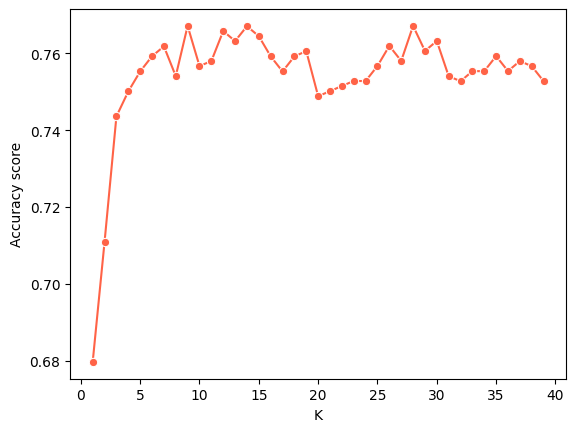

In [169]:
sns.lineplot(x = k_list, y = scores, marker = 'o', color = 'tomato')
plt.xlabel('K')
plt.ylabel('Accuracy score')
plt.show()

In [170]:
best_index = np.argmax(score)
best_k = k_list[best_index]

KNN = KNeighborsClassifier(best_k)
KNN.fit(X_scaled_train, Y_scaled_train)

KNeighborsClassifier(n_neighbors=6)

In [171]:
knn_pred = KNN.predict(X_scaled_test)
knn_accuracy = accuracy_score(Y_scaled_test, knn_pred)
print('Accuracy:', knn_accuracy)

Accuracy: 0.7705627705627706


In [172]:
knn_pred_proba = KNN.predict_proba(X_scaled_test)
clf_eval(Y_test.values, knn_pred, knn_pred_proba)

오차 행렬,
 [[140  10]
 [ 43  38]]
정확도: 0.7706, 정밀도: 0.7917, 재현율: 0.469136, F1: 0.5891, AUC:0.8297


In [173]:
from sklearn.metrics import classification_report

In [174]:
knn_report = classification_report(Y_scaled_test, knn_pred,
                                   target_names = ['Non-Diabetic','Diabetic'])
knn_report_dict = classification_report(Y_scaled_test, knn_pred,
                                   target_names = ['Non-Diabetic','Diabetic'],
                                        output_dict = True)

In [175]:
print('Classification Report:')
print(knn_report)

Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.77      0.93      0.84       150
    Diabetic       0.79      0.47      0.59        81

    accuracy                           0.77       231
   macro avg       0.78      0.70      0.71       231
weighted avg       0.77      0.77      0.75       231



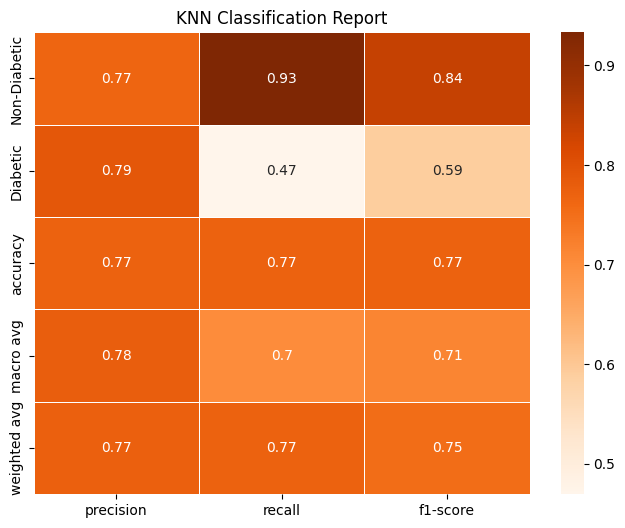

In [176]:
#히트맵으로 나타내기
plt.figure(figsize = (8,6))
sns.heatmap(pd.DataFrame(knn_report_dict).iloc[:-1,:].T, annot = True,
            cmap = 'Oranges', linewidth = .5)
plt.title('KNN Classification Report')
plt.show()

SVM

In [177]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [178]:
svm_classifier = SVC(kernel = 'linear')
svm_classifier.fit(X_scaled_train, Y_scaled_train)
svm_pred = svm_classifier.predict(X_scaled_test)
svm_accuracy = accuracy_score(Y_scaled_test, svm_pred)
print('SVM Model accuracy:', svm_accuracy)

SVM Model accuracy: 0.7359307359307359


In [179]:
print('Classification Report for SVM\n', classification_report(Y_scaled_test, svm_pred))

Classification Report for SVM
               precision    recall  f1-score   support

           0       0.75      0.89      0.81       150
           1       0.69      0.44      0.54        81

    accuracy                           0.74       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.73      0.74      0.72       231



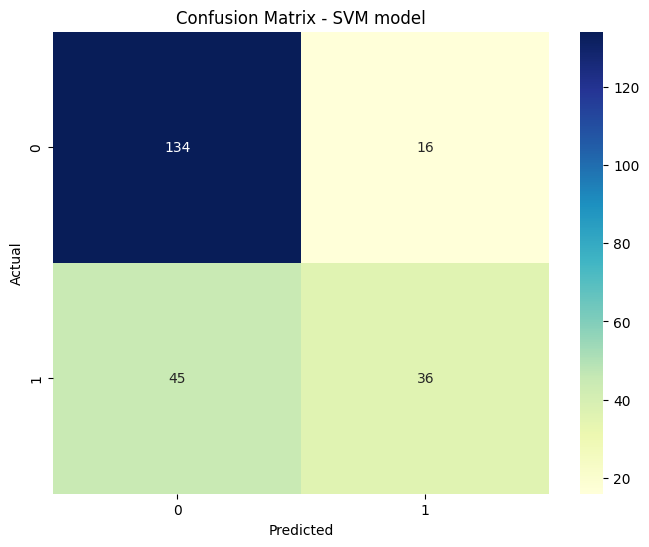

In [180]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(Y_scaled_test, svm_pred), cmap = 'YlGnBu',annot = True, fmt = 'g')
plt.title('Confusion Matrix - SVM model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [181]:
param_grid_svm = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear','poly','rbf','sigmoid']}
GS_svm = GridSearchCV(SVC(), param_grid = param_grid_svm)
GS_svm.fit(X_scaled_train, Y_scaled_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [182]:
print('Accuracy:', GS_svm.score(X_scaled_test,Y_scaled_test))
print('Best Parameters:',GS_svm.best_params_)

Accuracy: 0.7489177489177489
Best Parameters: {'C': 1, 'kernel': 'rbf'}


In [183]:
dt_classifier = DecisionTreeClassifier(random_state = 123)
dt_classifier.fit(X_scaled_train, Y_scaled_train)
dt_pred = dt_classifier.predict(X_scaled_test)
dt_accuracy = accuracy_score(Y_scaled_test, dt_pred)
print('Decision Tree Model accuracy:',dt_accuracy)

Decision Tree Model accuracy: 0.7012987012987013


In [184]:
print('Classification Report for Decision Tree\n', classification_report(Y_scaled_test, dt_pred))

Classification Report for Decision Tree
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       150
           1       0.58      0.54      0.56        81

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.70      0.70       231



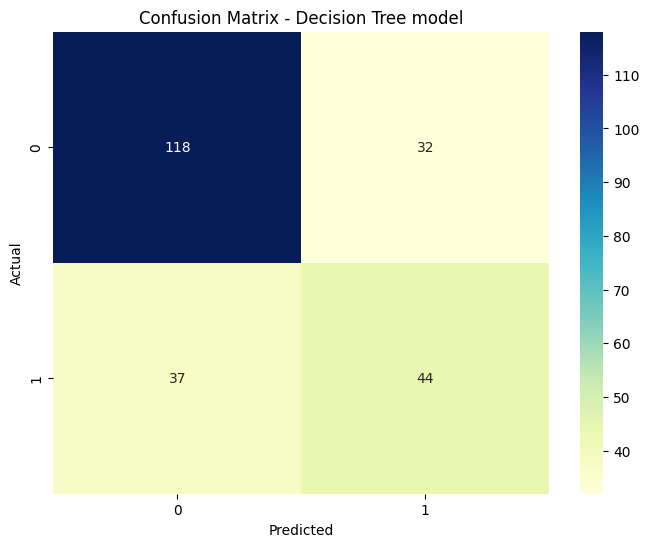

In [185]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(Y_scaled_test, dt_pred), cmap = 'YlGnBu', annot = True, fmt = 'g')
plt.title('Confusion Matrix - Decision Tree model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [186]:
print('-'*60)
print('Accuracy for each Model'.center(60))
print('* Logistic Regression :',grid_search.score(X_test_scaled3,Y_test_new), 'Hyperparameter tunning O')
print('* KNN :',knn_accuracy, 'Hyperparameter tunning O')
print('* SVM :', GS_svm.best_score_, 'Hyperparameter tunning O')
print('* Decision Tree :',dt_accuracy, 'Hyperparameter tunning X')

------------------------------------------------------------
                  Accuracy for each Model                   
* Logistic Regression : 0.765625 Hyperparameter tunning O
* KNN : 0.7705627705627706 Hyperparameter tunning O
* SVM : 0.7634475597092419 Hyperparameter tunning O
* Decision Tree : 0.7012987012987013 Hyperparameter tunning X


추가 - testset을 10%만 지정하면?

In [187]:
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_scaled, Y, test_size = 0.1,
                                                                    random_state = 123, stratify = Y)

In [188]:
X_train_exp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
63,-0.470745,0.635135,-1.054204,-0.520642,-0.123079,-0.663025,0.685941,-0.786286
510,-0.227064,-1.238867,-0.165918,-0.590779,-0.205021,-0.320526,-0.528147,1.085644
422,2.426488,-0.647077,-0.673510,-0.240093,-0.699692,0.547668,0.072856,-1.041549
637,-0.470745,-0.910094,0.087878,-0.894706,-0.838079,-0.169190,0.534935,-0.871374
440,2.426488,2.213242,1.864449,-0.731053,-0.205021,0.045868,-0.111371,0.660206
...,...,...,...,...,...,...,...,...
112,-0.495113,-1.074480,0.087878,-0.520642,-1.172515,-0.201050,-0.845260,-0.871374
309,-0.470745,0.076222,-0.419714,-0.660916,0.764905,-0.065643,1.217481,-0.275760
751,-0.495113,-0.022409,0.214776,-0.403747,-0.745821,0.420227,-0.636871,-0.445935
79,-0.470745,-0.318304,-0.546612,-0.801190,-0.205021,-0.694885,-0.497946,-0.786286


In [189]:
LR_exp = LogisticRegression()
LR_exp.fit(X_train_exp,y_train_exp)
exp_pred = LR_exp.predict(X_test_exp)
accuracy_exp = accuracy_score(y_test_exp, exp_pred)
print('Accuracy :',accuracy_exp)

Accuracy : 0.8051948051948052


???